# Multiple Qubits and Entangled States
## Representing Muli-Qubit States

To store the four states that come from using two qubits, we can represent these states as 4-D-vector:

$$ \ket{z} = \begin{bmatrix} z_{00} \\ z_{01} \\ z_{10} \\ z_{11} \end{bmatrix} $$

The subscript $ab$ in $z_{ab}$ represents a unique state that can be represented by both of the qubits. The rule of measurement is the same:

$$ p(\ket{00}) = |\braket{00|z}|^2 = |z_{00}|^2 $$

Given two separated qubits
$$ \ket{y} = \begin{bmatrix} y_0 \\ y_1 \end{bmatrix}, \ket{z} = \begin{bmatrix} z_0 \\ z_1 \end{bmatrix} $$
the kronecker product can be used to calculate their collective state:
$$ \ket{yz} = \ket{y} \otimes \ket{z} = \begin{bmatrix} z_0 y_0 \\ z_0 y_1 \\ z_1 y_0 \\ z_1 y_1 \end{bmatrix} $$
This also applies for collective states of any number of qubits. In general, a quantum computer with $n$ qubits will need to track $2^n$ complex amplitudes, which can prove demanding for even supercomputers when the number of qubits approaches three digits. Below is a circuit demonstrating the state of three separate qubits:



In [47]:
from qiskit import QuantumCircuit, Aer, assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_state_qsphere
import numpy as np
sim = Aer.get_backend('aer_simulator')

In [21]:
qc = QuantumCircuit(3)
[qc.h(i) for i in range(3)]
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [22]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
array_to_latex(state, prefix="\\text{Statevector} = ")


<IPython.core.display.Latex object>

## Single Qubit Gates on Multi-Qubit Statevectors
Just as the kronecker product was used to calculate multi-qubit statevectors, the tensor product is used to calculate matrices to act on statevectors. This is expanded upon in the code below:

In [23]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

The simultaneous operations from both of these qubits are:
$$ X\ket{q_0} \otimes H\ket{q_1} = (X\otimes H) \ket{q_1} \ket{q_2} $$
This can be done by the aer_simulator:

In [24]:
qc.save_unitary()
qobj = assemble(qc)
unitary = sim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

A gate applied to only 1 qubit is described by using the kronecker product with the identity matrix. Applying this to two qubits, one with a not gate, we get:
$$ X \otimes I $$
We can check this by making a circuit as follows:

In [106]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [107]:
qc.save_unitary()
qobj = assemble(qc)
unitary = sim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = } ")


<IPython.core.display.Latex object>

This circuit is clearly the result of applying $ X \otimes I $ which simplifies to
$$ \begin{bmatrix} 0 & I \\ I & 0 \end{bmatrix} $$

## Multi-Qubit Gates
### CNOT-gate
Below shows the CNOT gate in action, which was initially presented in an earlier notebook:

In [27]:
qc = QuantumCircuit(2)
qc.cx(0, 1)
qc.draw()

q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘

While simple in classical bits, let's see how it behaves when we use a qubit in superposition:

In [33]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw()

┌───┐
q_0: ┤ H ├
     └───┘
q_1: ─────

In [34]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
array_to_latex(state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

This is the same as performing $ \ket{0} \otimes \ket{+} $. Applying the CNOT gate:

In [42]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [43]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
array_to_latex(state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

This is an entangled state.

### Entangled States
The previous calculation allowed for the creation of the state:
$$ \frac{1}{\sqrt{2}} (\ket{00} + \ket{11}) $$
This state is known as the Bell state, which has a 50% chance of being measured in states $ \ket{00} $ and $ \ket{11} $, and a 0% chance of being measured in the other states.

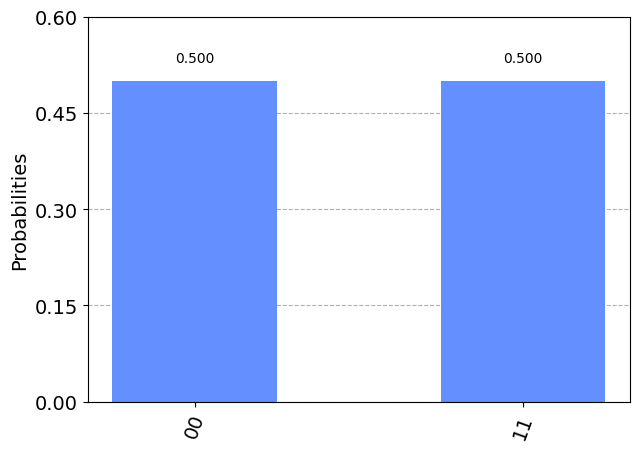

In [38]:
plot_histogram(sim.run(qobj).result().get_counts())

Since the other states cannot be measured from this, measuring one collapses the superposition and has an effect on the other. This reflects the 'spooky action at a distance', a phenomena within quantum mechanics. Shared quantum states cannot be used to communicate (no-communication theorem). 

## Visualising Entangled States
When we attempt to plot these states on a bloch sphere, there is a "loss of information".

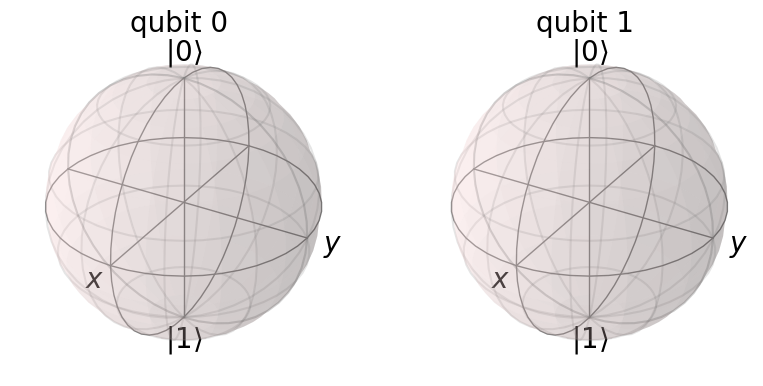

In [44]:
plot_bloch_multivector(state)

There is no single measurement basis for which a specific measurement is guaranteed. A better way of visualising comes from using the Q-sphere, where amplitudes are represented by proportionally sized spheres on the surface of the sphere, and colour is proportional to the phase of the amplitude.

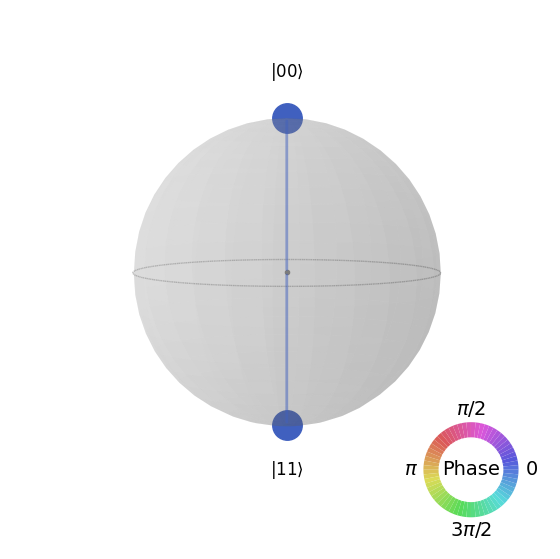

In [48]:
plot_state_qsphere(state)

### Exercises

In [114]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.x(0)
qc.draw()

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘

In [115]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
array_to_latex(state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [120]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.x(0)
qc.draw()

┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ X ├
     └───┘┌─┴─┐└───┘
q_1: ─────┤ X ├─────
          └───┘

In [121]:
qc.save_unitary()
qobj = assemble(qc)
unitary = sim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix='\\text{Unitary = }')

<IPython.core.display.Latex object>

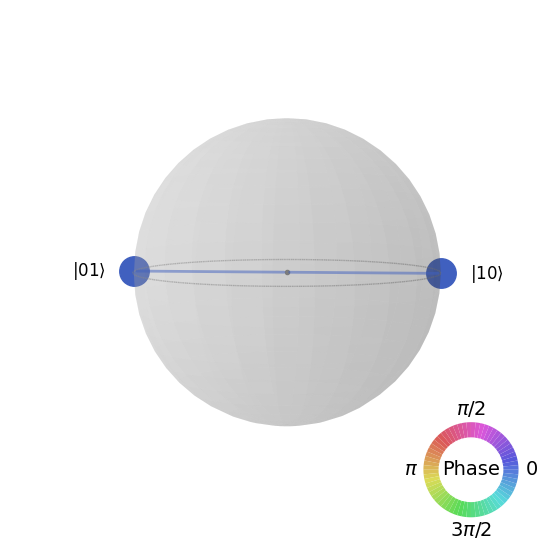

In [122]:
plot_state_qsphere(state)